In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [103]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\EastWestAirlines.csv")

In [104]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Data Preprocessing:

In [105]:
data.isnull().sum().sum()

0

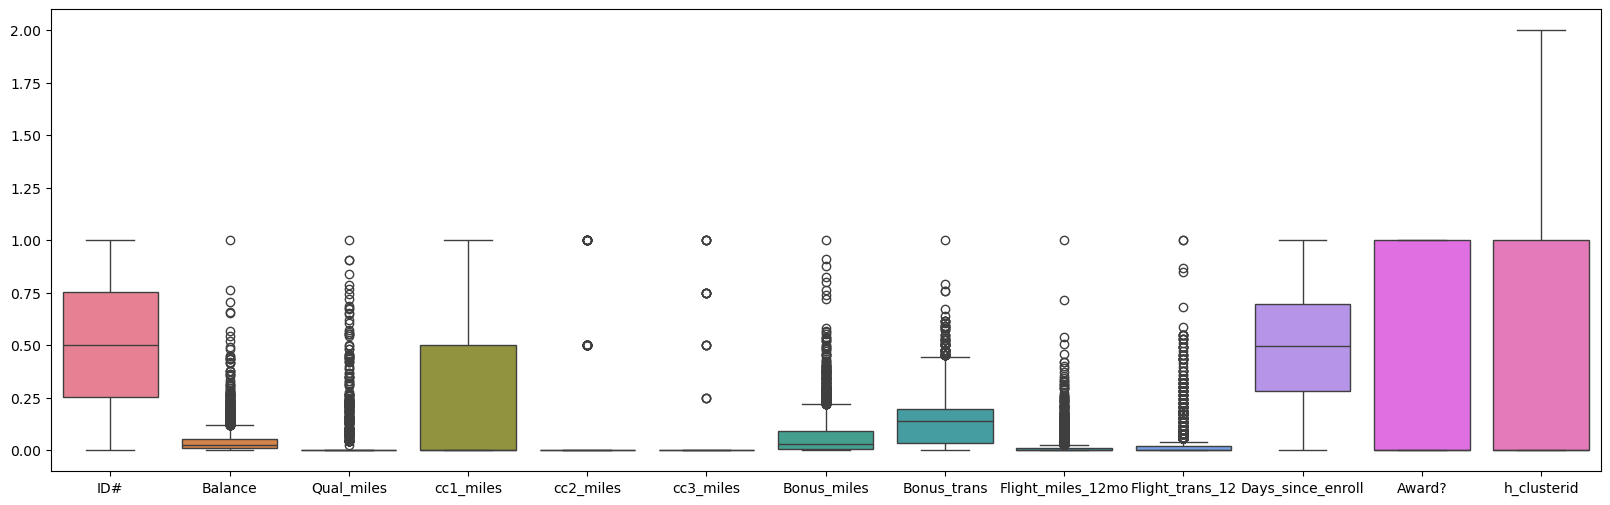

In [106]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.show()

In [107]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [108]:
# Removing outliers
filtered_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [110]:
df=norm_func(data)

In [111]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


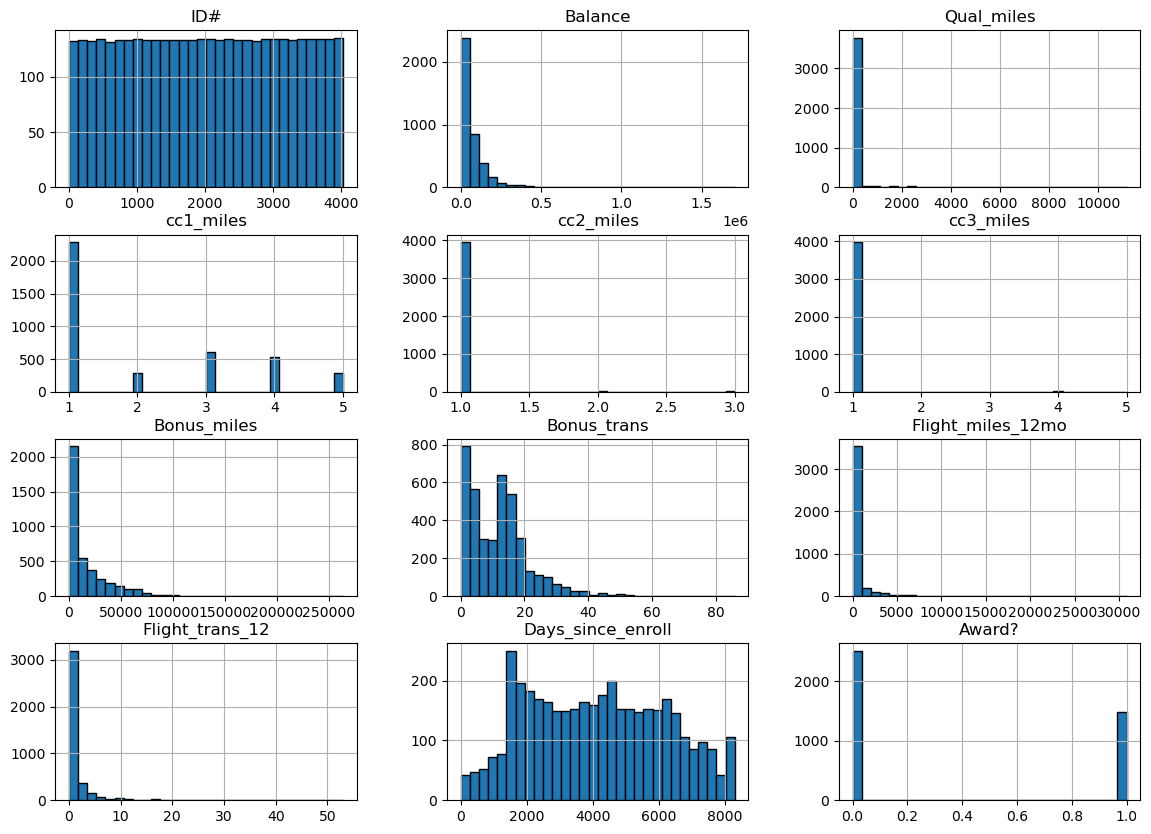

In [112]:
data.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.show()

# 2) Implementing Clustering Algorithms:

In [134]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# hierachical clustering

In [135]:
dm=sch.linkage(df,metric='euclidean',method='complete')

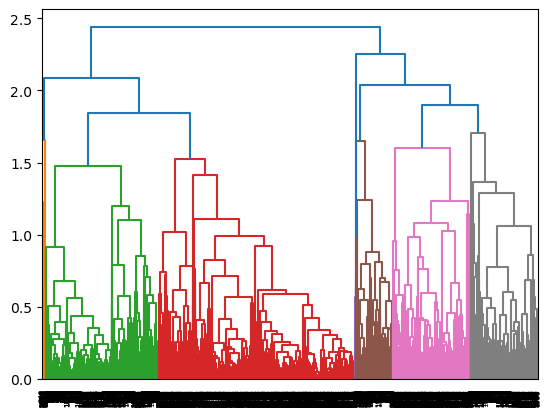

In [335]:
#dendrogram
dd=sch.dendrogram(sch.linkage(df,method='complete'))

In [348]:
# create clusters
hc= AgglomerativeClustering(n_clusters=5, metric= 'euclidean', linkage= 'complete')
hc.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [350]:
hc.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [338]:
data['h_clusterid']=hc.labels_

In [339]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [340]:
data.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0,3
1352,1365,92859,0,4,1,1,33378,15,0,0,5185,1,0,2
1351,1364,39946,0,3,1,1,16951,14,0,0,5282,1,0,2
1347,1360,228529,0,2,1,1,24687,14,500,1,4924,1,0,0
3278,3301,101290,0,4,1,1,33876,22,500,1,2291,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,1567,6341,0,1,1,1,3658,12,0,0,3706,0,4,1
1553,1568,3641,0,1,1,1,1164,3,0,0,3603,0,4,1
1554,1569,39207,0,1,1,1,965,3,0,0,3757,0,4,1
1543,1558,53869,0,1,1,1,6750,26,0,0,4940,0,4,1


In [327]:
data.groupby(['h_clusterid']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
h_clusterid,,,,,,,,,,,,,
0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0,2.419956
1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0,1.017588
2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0,1.000000
3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0,2.108963
4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0,1.000000


# K-means clustering

In [184]:
from sklearn.cluster import KMeans

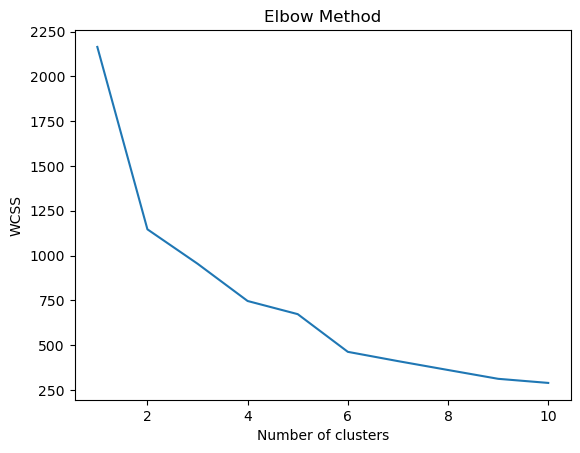

In [186]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [304]:
#Build Cluster algorithm
clusters= KMeans(5, random_state=42)
clusters.fit(df)

KMeans(n_clusters=5, random_state=42)

In [306]:
clusters.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [310]:
data['clusterid_new']=clusters.labels_

In [312]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [314]:
data.sort_values('clusterid_new')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
1417,1431,34584,0,1,1,1,6962,21,1500,7,5202,1,0,0
815,825,24011,0,2,1,1,20442,9,0,0,6123,1,0,0
254,258,96098,0,1,1,1,12500,4,0,0,7339,1,0,0
1620,1635,276607,0,1,1,1,11430,14,6430,11,4791,1,0,0
469,475,82528,0,1,1,1,2100,5,600,4,8228,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2666,7515,0,2,1,1,13681,18,0,0,2552,1,0,4
2650,2670,5432,0,1,1,1,1000,2,1000,2,2535,1,0,4
2656,2676,644881,2600,1,1,1,14350,28,10850,26,2511,1,0,4
2607,2626,7041,0,1,1,1,1747,12,0,0,2718,1,0,4


In [316]:
data.groupby(['clusterid_new']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
clusterid_new,,,,,,,,,,,,,
0,880.657233,104939.188679,369.276730,1.163522,1.025157,1.018868,9089.223270,10.820755,1031.481132,3.295597,6094.006289,1.000000,0.056604
1,2183.154553,58970.101038,87.892572,1.686901,1.013978,1.008786,9905.389776,9.070687,223.850240,0.643371,3801.982428,0.000000,1.019968
2,767.019956,135706.110865,230.314856,4.133038,1.002217,1.015521,51933.461197,20.651885,745.534368,2.348115,6350.019956,0.968958,0.031042
3,2595.180593,78846.361186,153.326146,3.692722,1.000000,1.037736,38762.363881,19.725067,673.153639,1.897574,3142.959569,1.000000,0.010782
4,2822.132394,64350.585915,219.845070,1.149296,1.039437,1.000000,8636.459155,10.169014,1028.887324,3.016901,2766.659155,1.000000,0.045070


# DBSCAN clustering

In [218]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [230]:
array=data.values
array

array([[    1, 28143,     0, ...,     0,     1,     1],
       [    2, 19244,     0, ...,     0,     1,     1],
       [    3, 41354,     0, ...,     0,     1,     1],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     3],
       [ 4020, 54899,     0, ...,     0,     1,     1],
       [ 4021,  3016,     0, ...,     0,     1,     1]], dtype=int64)

In [232]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [252]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [254]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [256]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,-1
3996,-1
3997,0


In [258]:
f_data=pd.concat([data,cl],axis=1)

In [260]:
f_data.sort_values('cluster')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,cluster
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0,3,-1
1496,1511,48863,0,5,1,1,71013,18,1050,3,4925,1,0,2,-1
3146,3168,89237,0,4,1,2,37668,18,0,0,2533,0,1,1,-1
3147,3169,93028,0,4,1,1,40887,22,0,0,2507,1,0,3,-1
3148,3170,89094,0,5,1,1,55865,13,0,0,2404,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,3995,35185,0,2,1,1,5957,7,0,0,1439,0,1,1,24
3797,3820,55473,0,2,1,1,10156,7,0,0,1751,0,1,1,24
3875,3898,70659,0,2,1,1,9178,8,0,0,1622,0,1,1,24
3483,3506,65664,0,2,1,1,11899,5,0,0,1121,0,1,1,24


# visualization:

In [264]:
from sklearn.decomposition import PCA

In [266]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)


In [274]:
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca['KMeans_Cluster'] = clusters.labels_
df_pca['Agglo_Cluster'] = hc.labels_
df_pca['DBSCAN_Cluster'] = dbscan.labels_

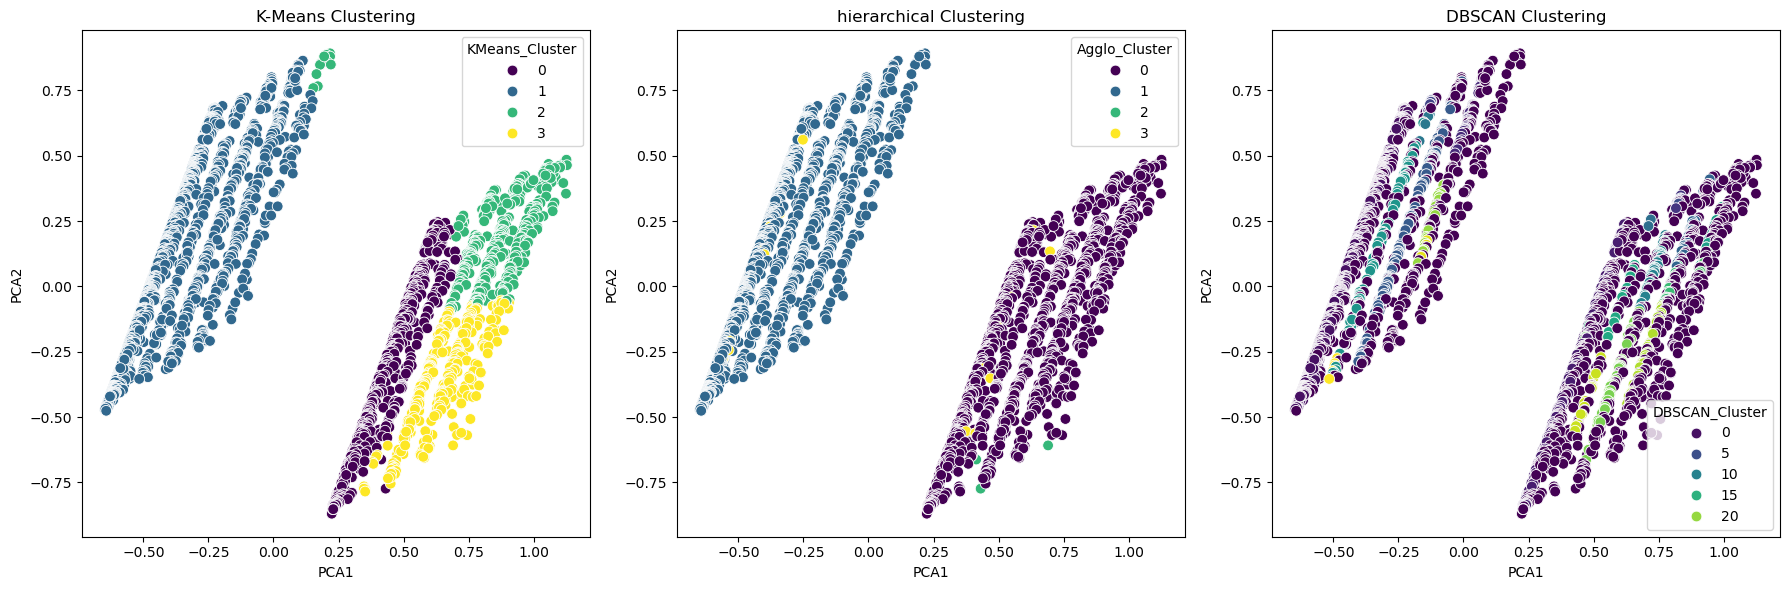

In [278]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=60)
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Agglo_Cluster', palette='viridis', s=60)
plt.title('hierarchical Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=60)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

# Evaluation and Performance Metrics:

In [296]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(df, clusters.labels_)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')

Silhouette Score for K-Means: 0.405


In [298]:

silhouette_dbscan = silhouette_score(df, dbscan.labels_)
print(f'Silhouette Score for K-Means: {silhouette_dbscan:.3f}')

Silhouette Score for K-Means: -0.359
